### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [187]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [188]:
# Load the CSV file(s) as reviews.
rw = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
rw.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [189]:
# Any missing values?
rw.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

there are no missing values

In [190]:
# Explore the data.
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [191]:
# Descriptive statistics.
rw.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## Notes

spending_score and loyalty_points are of particular interest here. loyalty_points values range from 25 to 6847 with a mean of 1578.032 suggesting that this might not be normally distributed. spending_score values range from 1 to 99 with a mean of 50 which suggests that this is normally distributed.

## 2. Drop columns

In [192]:
# Drop unnecessary columns.
rw = rw.drop(['language', 'platform'], axis=1)

In [193]:
# View column names.
rw.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [194]:
# Rename the column headers.
rw1 = rw.rename(columns={"remuneration (k£)": "remuneration", "spending_score (1-100)": "spending_score"})
# View column names.
rw1.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [195]:
# Create a CSV file as output.
rw1.to_csv('reviews_clean.csv')

In [196]:
# Import new CSV file with Pandas.
review = pd.read_csv('reviews_clean.csv')

# View DataFrame.
review.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

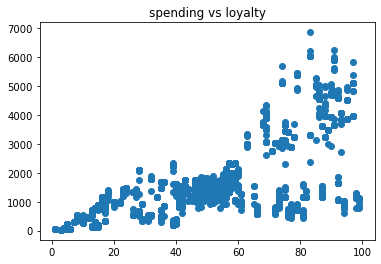

In [206]:
# Independent variable.
y = review['loyalty_points'].tolist()

# Dependent variable.
x = review['spending_score'].tolist()
#title
plt.title("spending vs loyalty")
# print scatter plot
plt.scatter(x, y)

In [207]:
#OLS model and summary
f = 'y ~ x'
model1 = ols(f, data = review).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        17:36:45   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
# Extract the estimated parameters.
print('Parameters: ', model1.params)  

# Extract the standard errors.
print('Standard errors: ', model1.bse)

# Extract the predicted values.
print('Predicted values: ', model1.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [209]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_svl = (model1.params["Intercept"]) + model1.params["x"] * review['spending_score']

# View the output.
y_pred_svl

0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Name: spending_score, Length: 2000, dtype: float64

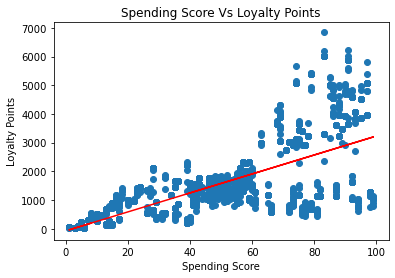

In [211]:
# Plot the graph with a regression line.
plt.scatter(x, y)
plt.plot(x, y_pred_svl, color='red')

# Set labels.
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Spending Score Vs Loyalty Points')

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [213]:
# Independent variable.
y = review['loyalty_points'].tolist()

# Define the independent variable.
x = review['remuneration'].tolist()

# OLS model and summary.
f = 'y ~ x'
model2 = ols(f, data = review).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        17:38:18   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
# Extract the estimated parameters.
print('Parameters: ', model2.params)  

# Extract the standard errors.
print('Standard errors: ', model2.bse)  

# Extract the predicted values.
print('Predicted values: ', model2.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [215]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred_rvl = (model2.params["Intercept"]) + model2.params["x"] * review['remuneration']

# View the output.
y_pred_rvl

0        354.823741
1        354.823741
2        382.857758
3        382.857758
4        410.891774
           ...     
1995    2821.817228
1996    3102.157397
1997    3102.157397
1998    3298.395515
1999    3102.157397
Name: remuneration, Length: 2000, dtype: float64

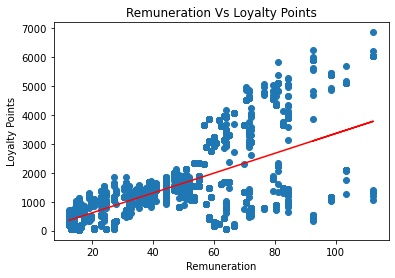

In [216]:
# Plot graph with regression line.
plt.scatter(x, y)

plt.plot(x, y_pred_rvl, color='red')

# Set labels.
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Remuneration Vs Loyalty Points')

# View plot.
plt.show()

### 5c) age vs loyalty

In [217]:
# Independent variable.
y = review['loyalty_points'].tolist()

# Define the independent variable.
x = review['age'].tolist()

# OLS model and summary.
f = 'y ~ x'
model3 = ols(f, data = review).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0577
Time:                        17:39:30   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
# Extract the estimated parameters.
print('Parameters: ', model3.params)  

# Extract the standard errors.
print('Standard errors: ', model3.bse)  

# Extract the predicted values.
print('Predicted values: ', model3.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [220]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_avl = (model3.params["Intercept"]) + model3.params["x"] * review['age']

# View the output.
y_pred_avl

0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Name: age, Length: 2000, dtype: float64

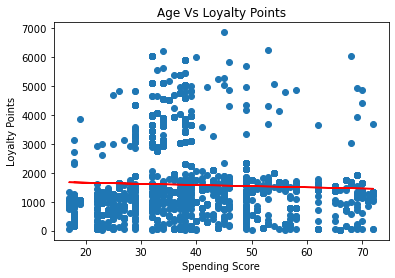

In [222]:
# Plot graph with regression line.
plt.scatter(x, y)

plt.plot(x, y_pred_avl, color='red')

# Set labels.
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Age Vs Loyalty Points')

# View plot.
plt.show()

## 6. Observations and insights

R-squared values for spending score vs loyalty points and renumeration vs loyaly suggests that there is a slight positive correlation between these variables. On the other hand, no correlation between age and loyalty points can be suggested based on the almsot 0 R-squared value.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [294]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [295]:
# Load the CSV file(s) as df2.
df = pd.read_csv('reviews_clean.csv')
df2 = df[['remuneration', 'spending_score']]

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [296]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [297]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

[Text(0.5, 1.0, ' Spending score Vs renumeration')]

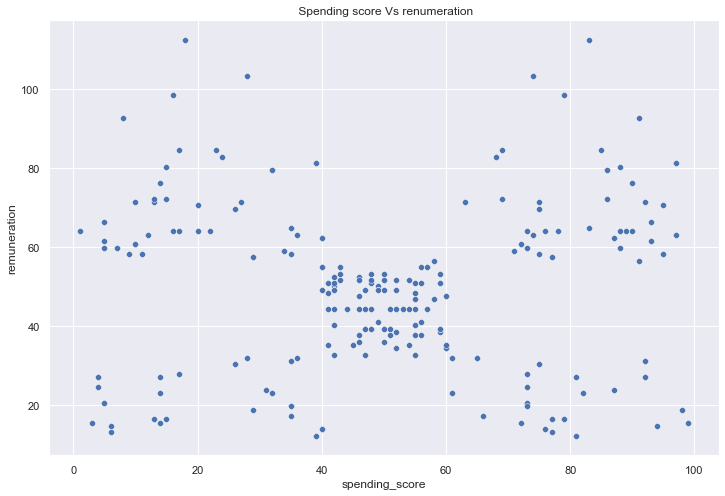

In [298]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score', y='remuneration', data=df2)\
                .set(title=' Spending score Vs renumeration')


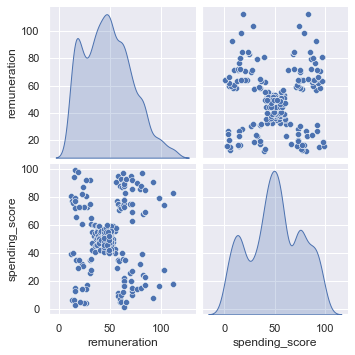

In [299]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2, vars=x, diag_kind= 'kde')

## 3. Elbow and silhoutte methods

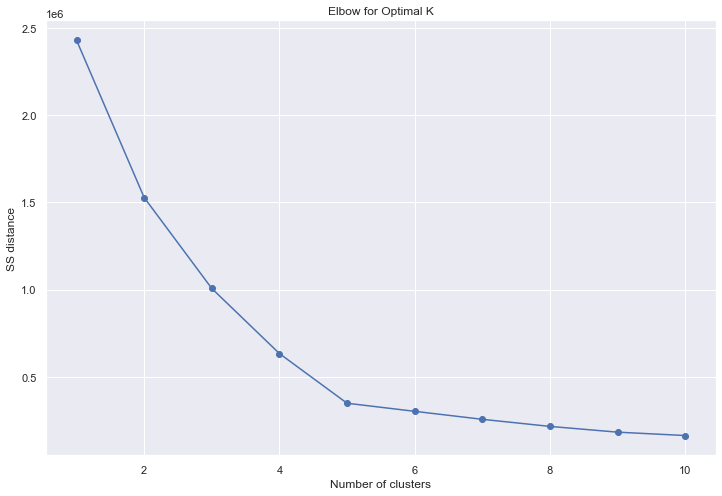

In [300]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11),ss, marker='o')

# labels and title.
plt.title("Elbow for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

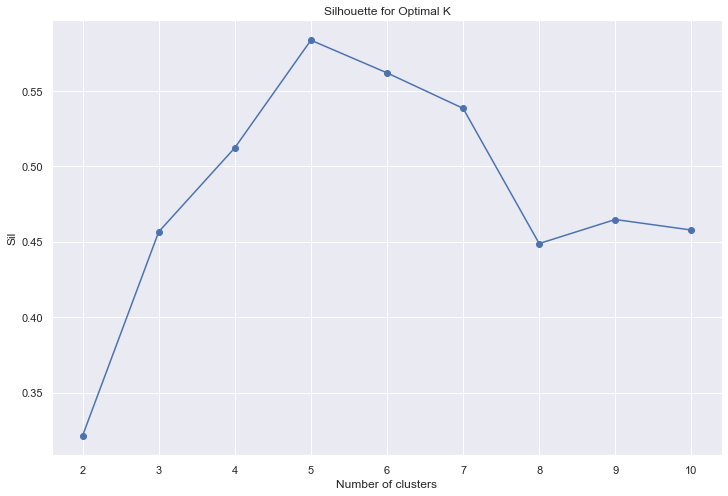

In [301]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot
plt.plot(range(2, kmax+1), sil, marker='o')

#labels and title.
plt.title("Silhouette for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

Evaluation at k=3

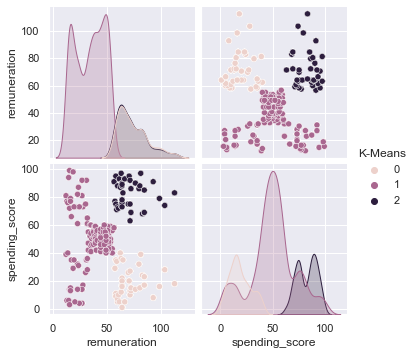

In [302]:
#3 clusters
kmeans = KMeans(n_clusters=3, max_iter=15000,\
                init='k-means++',random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means',\
             diag_kind='kde')

Evaluation at k=4

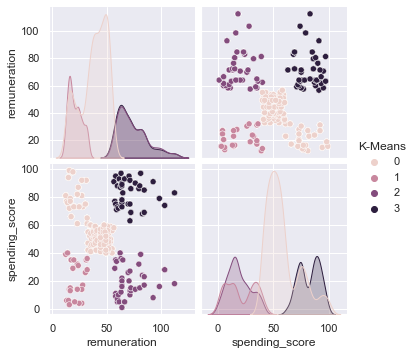

In [303]:
kmeans = KMeans(n_clusters=4, max_iter=15000,\
                init='k-means++',random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means',\
             diag_kind='kde')

## 5. Fit final model and justify your choice

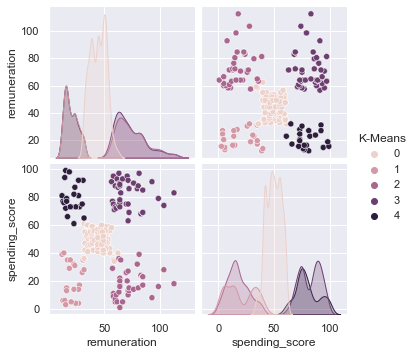

In [304]:
# Apply the final model.
# 5 clusters as silhoutte maxed at 5
kmeans = KMeans(n_clusters=5, max_iter=15000,\
                init='k-means++',random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means',\
             diag_kind='kde')

In [305]:
# Check the number of observations per predicted class.
x['K-Means'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means, dtype: int64

In [306]:
#view K-means predicted
x.head()

,remuneration,spending_score,K-Means
0,12.30,39,1
1,12.30,81,4
2,13.12,6,1
3,13.12,77,4
4,13.94,40,1


## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

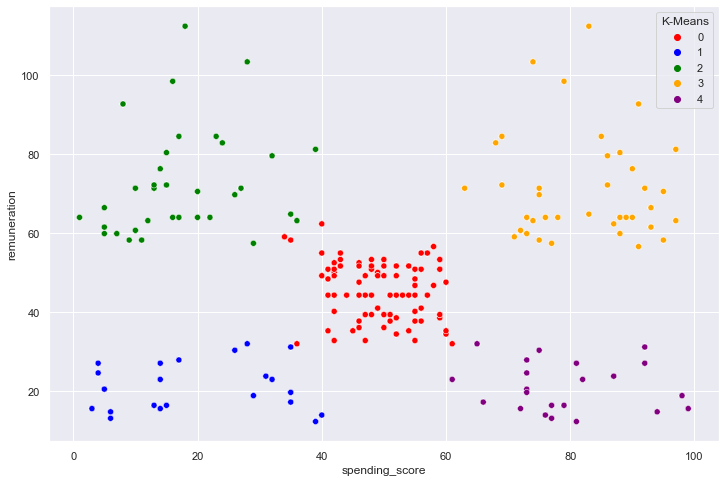

In [323]:
# Visualising the clusters.
#set size
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score', y='remuneration', data=x, hue='K-Means'\
               , palette=['red', 'blue', 'green', 'orange', 'purple'])


## 7. Discuss: Insights and observations

***Your observations here...***

from the 5 clusters it can be inferred that there is a strong relationship between remuneration and spending score. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [7]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

!pip install wordcloud
!pip install textblob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load the data set as df3.
df = pd.read_csv('reviews_clean.csv')
df3 = df[['review', 'summary']]
# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [10]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [11]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [12]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].str.lower()
# view output
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*:\n\nyour unpaint...
2    nice art, nice printing.  why two panels are f...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [13]:
# Change all summary data to lowercase.
df3['summary'] = df3['summary'].str.lower()
# view output
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [27]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
review.reset_index(inplace=True)
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9\n\nyour unpainted...
2    nice art nice printing  why two panels are fil...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [28]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
summary.reset_index(inplace=True)
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [16]:
# Drop duplicates in both columns.
#drop duplicates in review column
review = df3.drop_duplicates(subset=['review'])

#drop duplicates in summary column
summary = df3.drop_duplicates(subset=['summary'])

# View DataFrame.
summary.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [35]:
# String all the comments together in a single variable
all_reviews = ''
for i in range(review.shape[0]):
    all_reviews = all_reviews + review['review'][i]



In [36]:
# set colour palette
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 


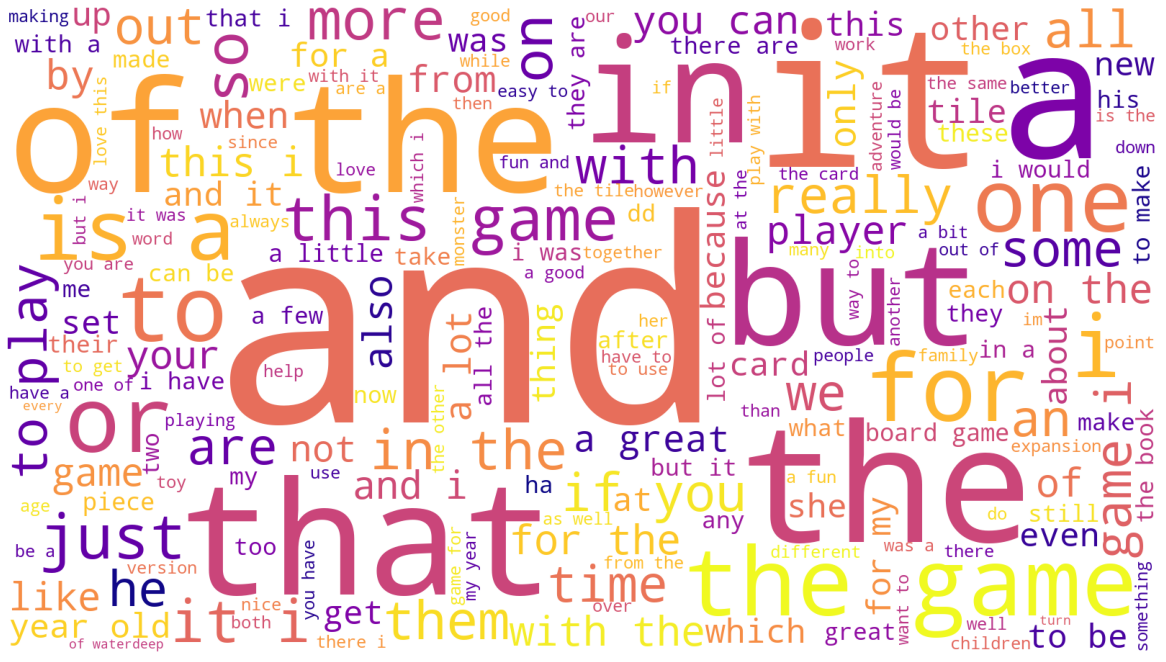

In [38]:
# Review: Create a word cloud.plt.figure(figsize = (16, 9), facecolor = None) 
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [39]:
# Summary: Create a word cloud.
# String all the comments together in a single variable.
all_summary = ''
for i in range(summary.shape[0]):
    # Add each comment.
    all_summary = all_summary + summary['summary'][i]

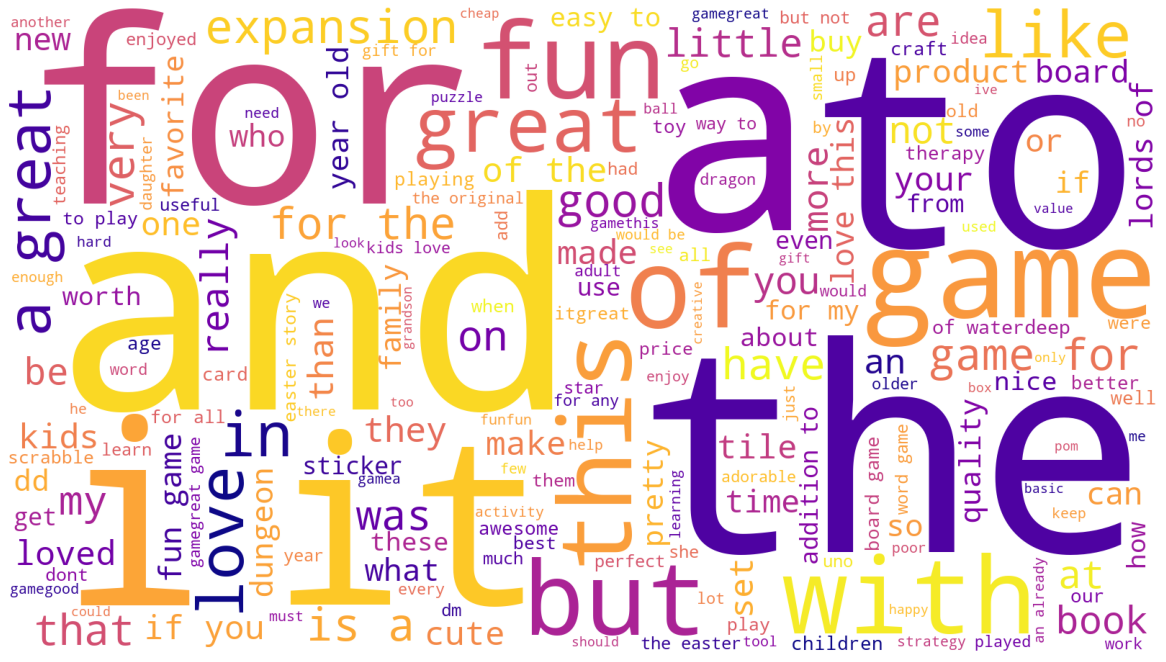

In [40]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary)

# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# 4. Frequency distribution and polarity
### 4a) Create frequency distribution

## frequency distribution for review

In [44]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenise review words.
review['tokens'] = review['review'].apply(word_tokenize)

#view output
review['tokens'].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maami\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [45]:
# Combine all review tokens into one list
review_tokens = []
for i in range(review.shape[0]): 
    review_tokens = review_tokens + review['tokens'][i]

In [47]:
# Determine the frequency distribution.
#  Compute the tokens with the maximum frequency
from nltk.probability import FreqDist
fdist = FreqDist(review_tokens)
fdist

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

# frequency distribution for summary

In [48]:
# tokenise summary words
summary['tokens'] = summary['summary'].apply(word_tokenize)

# view output
summary['tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens, dtype: object

In [50]:
# Combine all summary tokens into one list
summary_tokens = []

for i in range(summary.shape[0]):
    # Add each token to the list.
    summary_tokens = summary_tokens + summary['tokens'][i]
    

In [51]:
# Determine the frequency distribution.
#  Compute the tokens with the maximum frequency
fdist = FreqDist(summary_tokens)
fdist

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [52]:
# Delete all the alpanum for review
t1_review = [word for word in review_tokens if word.isalnum()]

# Delete all the alpanum for summary
t1_summary = [word for word in summary_tokens if word.isalnum()]

In [68]:
# Download the nltk resource and create stopwords list
nltk.download ('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maami\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Create a list of tokens without stopwords for review
t2_review = [x for x in t1_review if x.lower() not in english_stopwords]
tokens2_string_r = ''
for value in t2_review:
    tokens2_string_r = tokens2_string_r + value + ' '

In [70]:
# Create a list of tokens without stopwords for summary
t2_summary = [x for x in t1_summary if x.lower() not in english_stopwords]

tokens2_string_sum = ''
for value in t2_summary:
    tokens2_string_sum = tokens2_string_sum + value + ' '

### 4c) Create wordcloud without stopwords

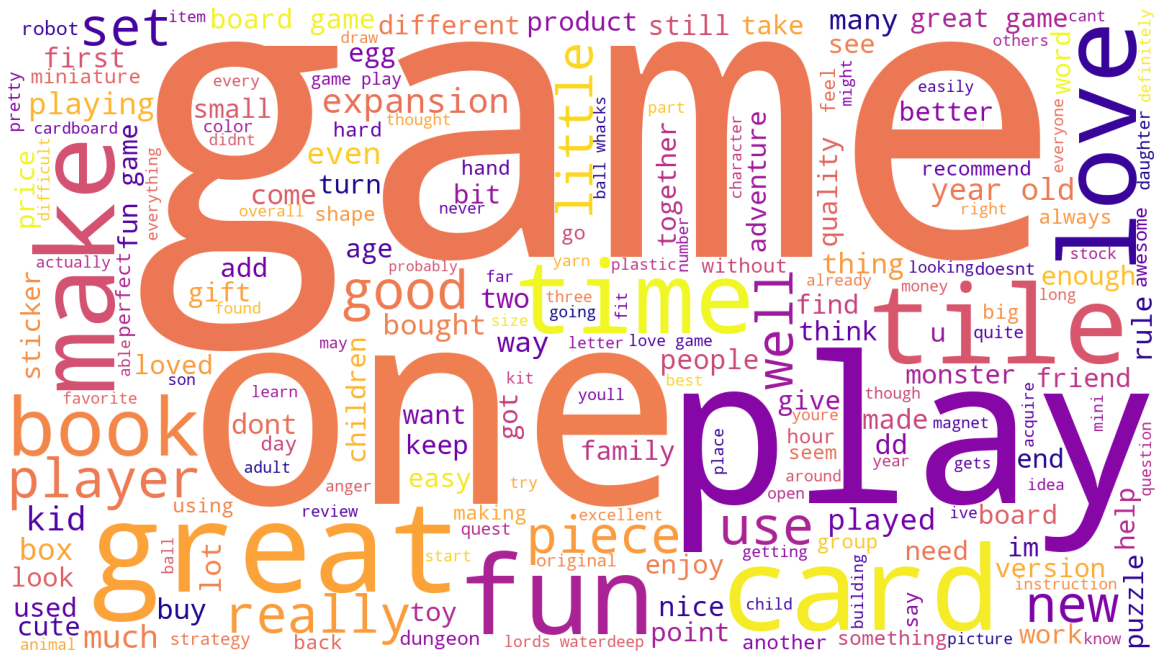

In [71]:
# Create a wordcloud for review without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string_r) 

# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

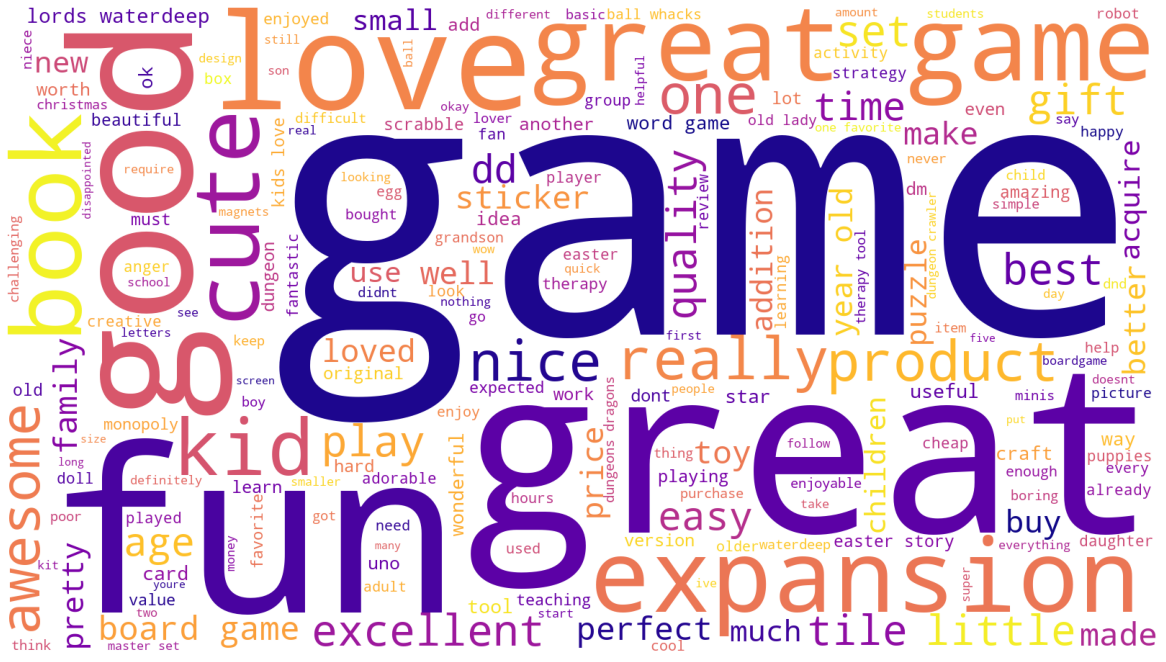

In [72]:
# Create a WordCloud for Summary without Stopwords.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string_sum) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


### 4d) Identify 15 most common words and polarity

In [74]:
# Determine the 15 most common words for review
fdistr = FreqDist(t2_review)
fdistr

FreqDist({'game': 1668, 'great': 579, 'fun': 549, 'one': 530, 'play': 502, 'like': 414, 'love': 322, 'really': 319, 'get': 319, 'cards': 301, ...})

In [75]:
# Determine the 15 most common words for summary
fdists = FreqDist(t2_summary)
fdists

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [92]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for review.
review['polarity'] = review['review'].apply(generate_polarity)

# Preview the result.
review['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

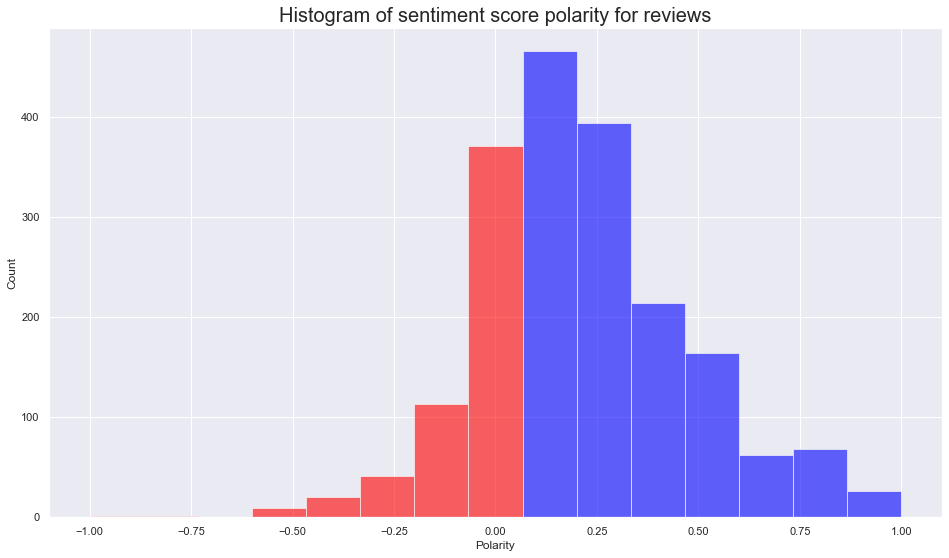

In [93]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(review['polarity'], num_bins,facecolor = 'grey', alpha=0.6)
# Histogram of sentiment score

# Highlight positive sentiment in blue
for patch in patches:
    if patch.get_x() > 0.05:
        patch.set_facecolor("blue")
    elif patch.get_x() < -0.05:
        patch.set_facecolor("red")

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize=20)

# Histogram of sentiment score for review
plt.show()

In [95]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for summary.
summary['polarity'] = summary['summary'].apply(generate_polarity)

# Preview the summary.
summary['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

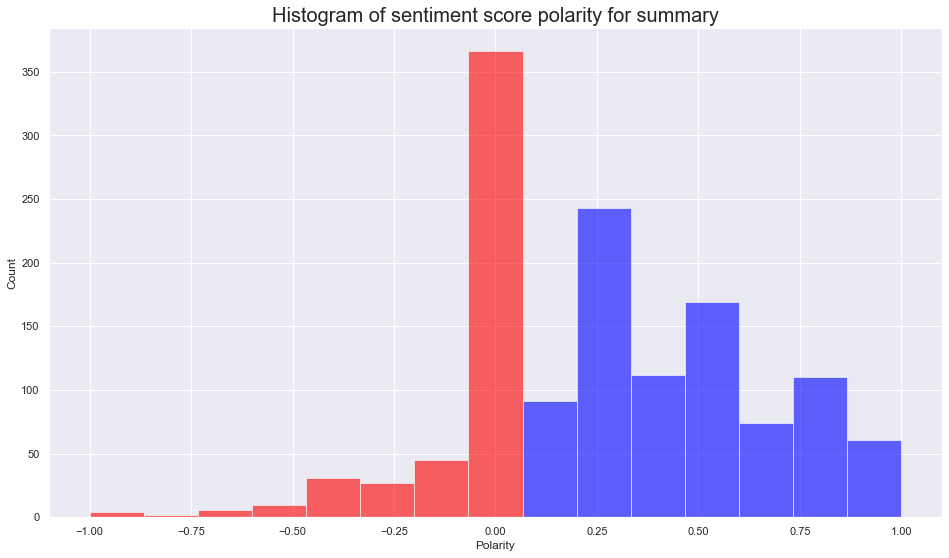

In [96]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(summary['polarity'], num_bins,facecolor = 'grey', alpha=0.6)
# Histogram of sentiment score

# Highlight positive sentiment in blue
for patch in patches:
    if patch.get_x() > 0.05:
        patch.set_facecolor("blue")
    elif patch.get_x() < -0.05:
        patch.set_facecolor("red")

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summary', fontsize=20)

# Histogram of sentiment score for summary
plt.show()



In [97]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
review['subjectivity'] = review['review'].apply(generate_subjectivity)

# Preview the result.
review['subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

Text(0.5, 1.0, 'Histogram of sentiment score subjectivity for review')

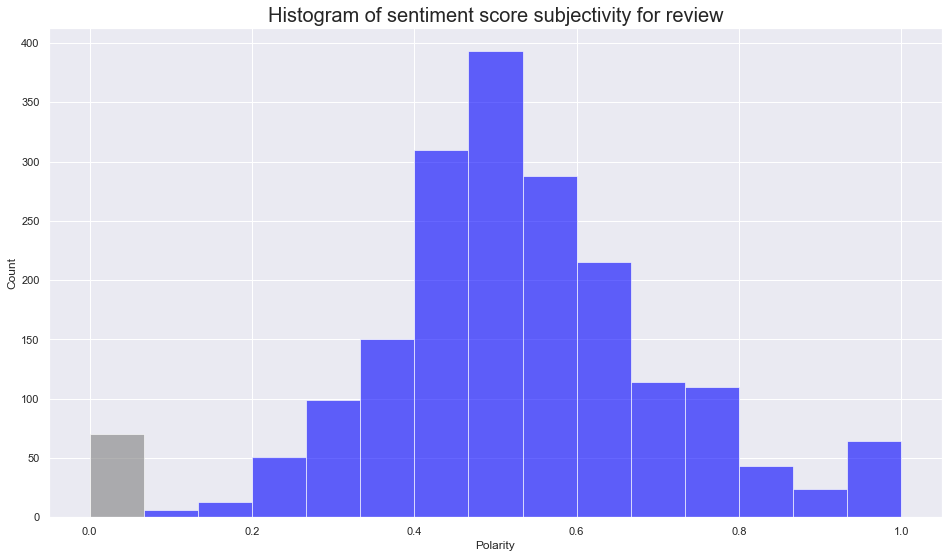

In [98]:
# Histogram of subjectivity reviews

num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(review['subjectivity'], num_bins,facecolor = 'grey', alpha=0.6)
# Histogram of sentiment score


# Highlight positive sentiment in blue
for patch in patches:
    if patch.get_x() > 0.05:
        patch.set_facecolor("blue")
    elif patch.get_x() < -0.05:
        patch.set_facecolor("red")

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for review', fontsize=20)

In [99]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
summary['subjectivity'] = summary['summary'].apply(generate_subjectivity)

# Preview the result.
summary['subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity, dtype: float64

Text(0.5, 1.0, 'Histogram of sentiment score subjectivity for summary')

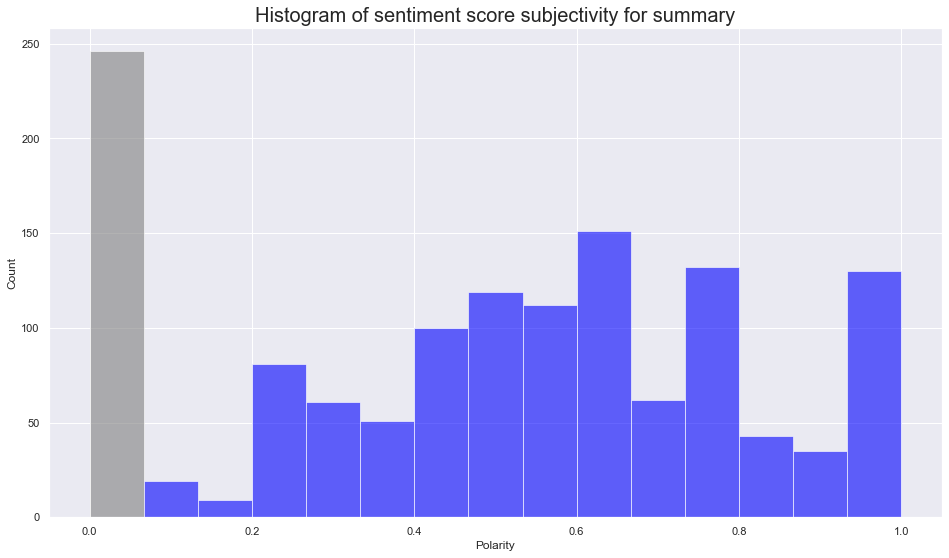

In [100]:
# Histogram of subjectivity summary

num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(summary['subjectivity'], num_bins,facecolor = 'grey', alpha=0.6)
# Histogram of sentiment score


# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Highlight positive sentiment in blue
for patch in patches:
    if patch.get_x() > 0.05:
        patch.set_facecolor("blue")
    elif patch.get_x() < -0.05:
        patch.set_facecolor("red")

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for summary', fontsize=20)

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [102]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_review = review.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review[['polarity', 'subjectivity', 'review']]

# Adjust the column width.
negative_sentiment_review.style.set_properties(subset=['review'], **{'width': '2400px'})

# View output.
negative_sentiment_review



,polarity,subjectivity,review
207,-1.000000,1.000000,booo unles you are patient know how to measur...
181,-0.780000,0.910000,incomplete kit very disappointing
1766,-0.583333,0.750000,im sorry i just find this product to be boring...
362,-0.550000,0.300000,one of my staff will be using this game soon s...
116,-0.500000,0.900000,i bought this as a christmas gift for my grand...
226,-0.500000,1.000000,this was a gift for my daughter i found it di...
229,-0.500000,1.000000,i found the directions difficult
289,-0.500000,1.000000,instructions are complicated to follow
300,-0.500000,1.000000,difficult
1496,-0.500000,0.700000,expensive for what you get


In [103]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment_summary = summary.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['polarity', 'subjectivity', 'summary']]

# Adjust the column width.
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '2400px'})

# View output.
negative_sentiment_summary

,polarity,subjectivity,summary
17,-1.000000,1.000000,the worst value ive ever seen
165,-1.000000,1.000000,boring unless you are a craft person which i am
588,-1.000000,1.000000,boring
838,-0.900000,0.700000,before this i hated running any rpg campaign d...
1,-0.800000,0.900000,another worthless dungeon masters screen from ...
116,-0.750000,0.750000,disappointed
266,-0.700000,0.200000,promotes anger instead of teaching calming met...
635,-0.700000,0.666667,too bad this is not what i was expecting
638,-0.700000,0.666667,bad qualityall made of paper
144,-0.650000,1.000000,at age 31 i found these very difficult to make


In [101]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment_review = review.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review[['polarity', 'subjectivity', 'review']]

# Adjust the column width.
positive_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
positive_sentiment_review



,polarity,subjectivity,review
7,1.0,1.0,came in perfect condition
164,1.0,1.0,awesome book
193,1.0,1.0,awesome gift
489,1.0,1.0,excellent activity for teaching selfmanagement...
517,1.0,1.0,perfect just what i ordered
583,1.0,1.0,wonderful product
601,1.0,1.0,delightful product
613,1.0,1.0,wonderful for my grandson to learn the resurre...
782,1.0,1.0,perfect
922,1.0,1.0,awesome


In [104]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment_summary = summary.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['polarity', 'subjectivity', 'summary']]

# Adjust the column width.
positive_sentiment_summary.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
positive_sentiment_summary

,polarity,subjectivity,summary
5,1.0,0.3,best gm screen ever
23,1.0,1.0,wonderful designs
27,1.0,1.0,perfect
61,1.0,1.0,theyre the perfect size to keep in the car or ...
107,1.0,1.0,perfect for preschooler
112,1.0,1.0,awesome sticker activity for the price
132,1.0,1.0,awesome book
133,1.0,1.0,he was very happy with his gift
150,1.0,1.0,awesome
166,1.0,1.0,awesome and welldesigned for 9 year olds


## 7. Discuss: Insights and observations


a strong relationship between sentiment score and subjectivity score can be clearly observed suggesting that customers reviews were feeling based rather, i.e. less objective. 
It is also evident that most reviews written are positive.

# 